In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol',  'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None, names=cols)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
heart_data=heart_data.replace({"num":{2:1,3:1,4:1}})
heart_data.replace("?",np.nan,inplace=True)
imputer=SimpleImputer(missing_values=np.nan, strategy="mean")
imputer=imputer.fit(heart_data)
heart_imputed=imputer.transform(heart_data)
heart_data_imputed=pd.DataFrame(heart_imputed,columns=cols)
heart_data_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1.0


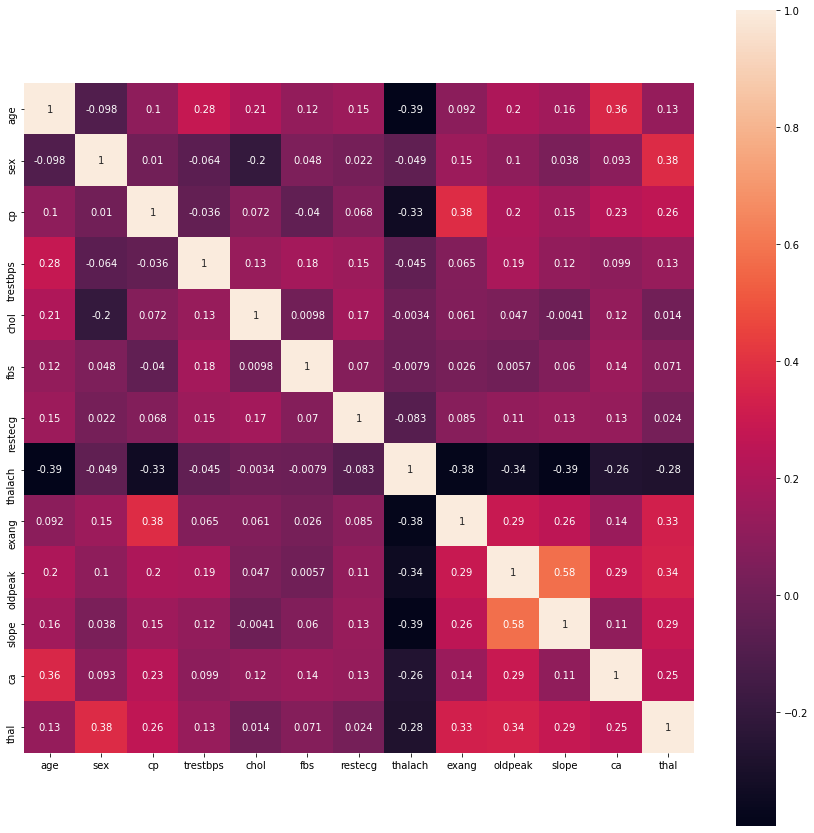

In [5]:
y=heart_data_imputed["num"]
y=np.array(y)
del heart_data_imputed["num"]
plt.figure(figsize=[15,15])
sns.heatmap(heart_data_imputed.corr(),annot = True, square = True)
plt.show()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(heart_data_imputed,y,test_size=0.25,random_state=0)
ss=StandardScaler()
X_train_norm=ss.fit_transform(X_train)
X_test_norm=ss.fit_transform(X_test)

In [11]:
LR=LogisticRegression()
clf=LR.fit(X_train_norm,y_train)
score=LR.score(X_train_norm,y_train)
print("Training score: ", score) 
y_pred=LR.predict(X_test_norm)

Training score:  0.8634361233480177


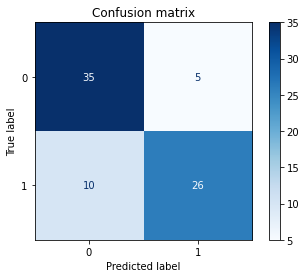

In [13]:

class_names=["0","1"]
plot_confusion_matrix(clf, X_test_norm, y_test,display_labels=class_names,cmap=plt.cm.Blues)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
plt.title('Confusion matrix')
plt.show()

In [14]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82        40
         1.0       0.84      0.72      0.78        36

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



In [16]:
log_reg_grid_rs = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
np.random.seed(42)
RS_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid_rs,
                                cv=5,
                                n_iter=20,
                                verbose=True)
RS_log_reg.fit(X_train_norm, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [17]:
print(RS_log_reg.best_params_)
print(RS_log_reg.score(X_train_norm, y_train))

{'solver': 'liblinear', 'C': 0.08858667904100823}
0.8678414096916299


In [18]:
y_preds = RS_log_reg.predict(X_test_norm)
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[36  4]
 [ 9 27]]


In [20]:
log_reg_grid_gs = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

GS_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid_gs,
                          cv=5,
                          verbose=True)
GS_log_reg.fit(X_train_norm, y_train)
print(GS_log_reg.best_params_)
y_preds = GS_log_reg.predict(X_test_norm)
print(confusion_matrix(y_test, y_preds))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 0.1082636733874054, 'solver': 'liblinear'}
[[36  4]
 [ 9 27]]
